In [3]:
#Statistical & machine learning approches for marketing

In [ ]:
#session 1 exercises : Edward Vrijghem 

In [5]:
adv <- read.csv('C:/Users/evrijghem/Documents/Statistics with Minh Phan/SML_Section1_v2.1/data/Advertising.csv', row.names=1)
head(adver)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


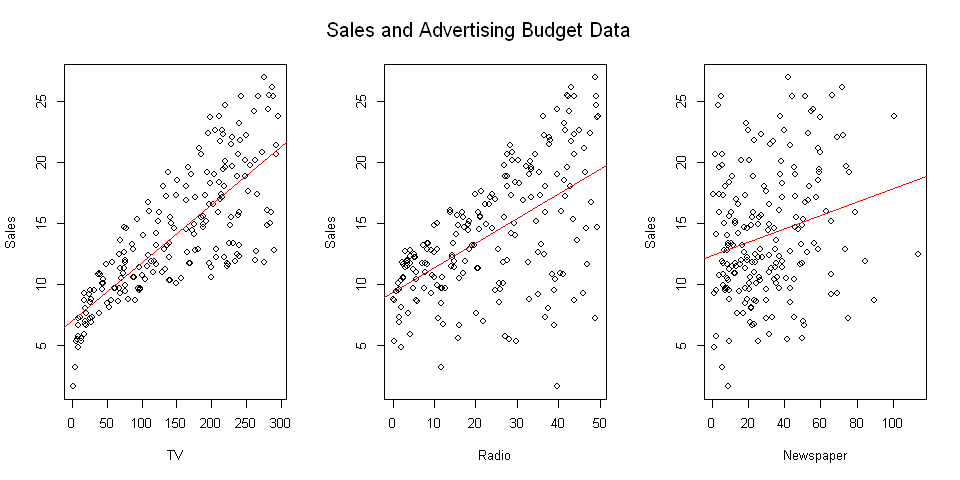

In [6]:
# Plot the data
options(repr.plot.width=8, repr.plot.height=4)  # Set plot size
par(mfrow=c(1, 3))  # Set the plot regions

plot(adv$TV, adv$sales, ylab="Sales", xlab="TV")
abline(lm(sales ~ TV, data=adv), col='red')

plot(adv$radio, adv$sales, ylab="Sales", xlab="Radio")
abline(lm(sales ~ radio, data=adv), col='red')

plot(adv$newspaper, adv$sales, ylab="Sales", xlab="Newspaper")
abline(lm(sales ~ newspaper, data=adv), col='red')

mtext("Sales and Advertising Budget Data", side=3, line=-2.5, outer=TRUE)

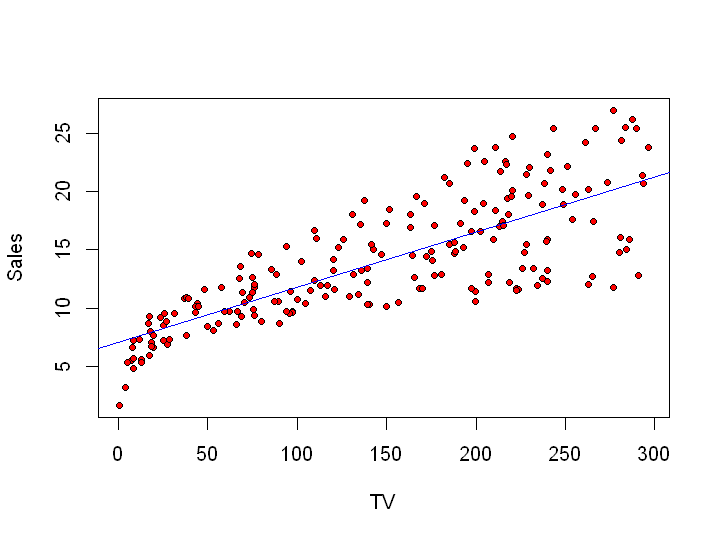

In [7]:
# Plot Sales ~ TV
options(repr.plot.width=6, repr.plot.height=4.5)  # Set plot size

plot(adv$TV, adv$sales, pch=21, cex=0.8, bg='red',
     xlab='TV', ylab='Sales')
abline(lm(sales ~ TV, data=adv), col='blue')

In [8]:
#excercise 1

x_mean <- mean(adv$TV)
y_mean <- mean(adv$sales)

adv$x_minus_mean <- adv$TV - x_mean
adv$y_minus_mean <- adv$sales - y_mean
adv$x_minus_mean2 <- (adv$TV -x_mean)^2

B1 <- sum(adv$x_minus_mean*adv$y_minus_mean)/sum(adv$x_minus_mean2)

print(paste("B1",B1))
      
B0 <- y_mean - (B1*x_mean)
      
print(paste("B0",B0))

[1] "B0= 7.03259354912769 B1= 0.0475366404330197"


In [9]:
# Check B0, B1 by lm function
md <- lm(sales ~ TV, data=adv)
summary(md)


Call:
lm(formula = sales ~ TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [10]:
#excercise 2

adv$num <- mapply(function (x,y) (x - mean(adv$radio)) * (y - mean(adv$sales)), adv$radio, adv$sales)
adv$denom <- mapply(function (x) (x - mean(adv$radio))**2, adv$radio)
B1 <- sum(adv$num) / sum(adv$denom)
                
B0 <- mean(adv$sales) - B1*mean(adv$radio)

print(paste("B0=",B0, "B1=", B1))

[1] "B0= 9.31163809515828 B1= 0.20249578339244"


In [11]:
summary(lm(sales ~ radio, data=adv))


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [12]:
#excercise 3
#RSS_tv 
adv$rsstv <- mapply(function(x,y)(y-B0-B1*x)**2,adv$radio,adv$sales)
RSS_tv <- sum(adv$rsstv)
RSE_tv <- (RSS_tv/(nrow(adv)-2))**0.5                    
#SE_B1
adv$dif2 <- (adv$TV-mean(adv$TV))**2                
SE_B1 <- (RSE_tv/sum(adv$dif2))**0.5
#SE_B0
SE_B0 <- (RSE_tv/nrow(adv) + (mean(adv$TV)/adv$dif2))**0.5             
#upper and lower bounds 
B1_low <- B1 - (2*SE_B1)
B1_high <- B1 + (2*SE_B1)
B0_low <- B0 -(2*SE_B0)
B0_high <- B0 + (2*SE_B0)

print(paste("B1:",B1_low,B1_high))
print(paste("B0:",B0_low,B0_high))

[1] "B1: 0.19908144185897 0.20591012492591"
  [1] "B0: 8.8984083116698 9.72486787864676"  
  [2] "B0: 8.93555916929286 9.6877170210237"  
  [3] "B0: 8.9646707632297 9.65860542708686"  
  [4] "B0: 3.86302007674072 14.7602561135758" 
  [5] "B0: 8.53598823464591 10.0872879556707" 
  [6] "B0: 8.97071149880318 9.65256469151339" 
  [7] "B0: 8.91307019269686 9.71020599761971" 
  [8] "B0: 8.36200009842561 10.261276091891"  
  [9] "B0: 8.97077659354347 9.65249959677309" 
 [10] "B0: 8.76682996781271 9.85644622250386" 
 [11] "B0: 8.89298227725463 9.73029391306194" 
 [12] "B0: 8.84904823946365 9.77422795085291" 
 [13] "B0: 8.9591852117706 9.66409097854597"  
 [14] "B0: 8.74143452411644 9.88184166620012" 
 [15] "B0: 8.7957260025012 9.82755018781536"  
 [16] "B0: 8.73110348817579 9.89217270214077" 
 [17] "B0: 8.88835819938246 9.7349179909341"  
 [18] "B0: 8.96800895680234 9.65526723351423" 
 [19] "B0: 8.88436139844532 9.73891479187124" 
 [20] "B0: -84.8721804348249 103.495456625142"
 [21] "B0: 8.863

In [13]:
md <- lm(sales ~ TV, data=adv)
summary(md)


Call:
lm(formula = sales ~ TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


In [15]:
#excercise 4 
adv$num    <- mapply(function (x,y) (x - mean(adv$radio)) * (y - mean(adv$sales)), adv$radio, adv$sales)
adv$denom  <- mapply(function (x) (x - mean(adv$radio))**2, adv$radio)
B1         <- sum(adv$num) / sum(adv$denom)           
B0         <- mean(adv$sales) - B1*mean(adv$radio)

adv$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adv$radio, adv$sales) 
RSS        <- sum(adv$rss)
RSE        <- (RSS/(nrow(adv)-2))**0.5
                  
SE_B0      <- ((RSE**2)*(1/nrow(adv) + (mean(adv$radio))**2 / sum(adv$denom)))**0.5
SE_B1      <- (RSE**2/sum(adv$denom))**0.5 

t          <- (B1 - 0) / SE_B1
p          <- 2*pt(t, nrow(adv)-1, lower=FALSE)

print(paste("T-Statistic: ", t))

[1] "T-Statistic:  9.92076547282496"


In [16]:
md <- lm(sales ~ radio, data=adv)
summary(md)


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
#excercise 5
adv$num    <- mapply(function (x,y) (x - mean(adv$newspaper)) * (y - mean(adv$sales)), adv$newspaper, adv$sales)
adv$denom  <- mapply(function (x) (x - mean(adv$newspaper))**2, adv$newspaper)
B1         <- sum(adv$num) / sum(adv$denom)           
B0         <- mean(adv$sales) - B1*mean(adv$newspaper)

adv$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adv$newspaper, adv$sales) 
RSS        <- sum(adv$rss)
RSE        <- (RSS/(nrow(adv)-2))**0.5

adv$y2     <- mapply(function (x) (x - mean(adv$sales))**2, adv$sales)
Correlation <- sum(adv$num) / ((sum(adv$denom)**0.5) * (sum(adv$y2)**0.5))
R2         <- Correlation**2
                     
print(paste("RSE:", RSE, " R2", R2))

In [18]:
#exercise 6
X <- as.matrix(cbind(1, adv$TV, adv$radio, adv$newspaper))
y <- as.matrix(adv$sales)

B <- solve(t(X) %*% X) %*% t(X) %*% y

for (coef in 1:nrow(B)){print(paste(coef, "Coefficient:", B[coef]))}

[1] "1 Coefficient: 2.93888936945944"
[1] "2 Coefficient: 0.0457646454553974"
[1] "3 Coefficient: 0.188530016918204"
[1] "4 Coefficient: -0.00103749304247596"


In [19]:
md <- lm(sales ~ ., data=adv)
summary(md)


Call:
lm(formula = sales ~ ., data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1714 -0.3583 -0.0025  0.3865  2.0518 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.277e+00  1.542e-01  27.733  < 2e-16 ***
TV           3.796e-02  6.330e-04  59.972  < 2e-16 ***
radio        2.030e-01  4.253e-03  47.718  < 2e-16 ***
newspaper    2.611e-03  2.406e-03   1.085    0.279    
num          1.945e-02  8.602e-04  22.612  < 2e-16 ***
denom       -3.451e-03  3.261e-04 -10.583  < 2e-16 ***
rsstv       -1.614e-02  3.163e-03  -5.101 8.07e-07 ***
dif2        -6.171e-05  1.162e-05  -5.310 3.01e-07 ***
rss                 NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6855 on 192 degrees of freedom
Multiple R-squared:  0.9833,	Adjusted R-squared:  0.9827 
F-statistic:  1620 on 7 and 192 DF,  p-value: < 2.2e-16


In [ ]:
#excercises from the book 

In [23]:
#excercise 2
#a) Regression, N=500 (sample size) and P= 3 (profit,number of employees and Industry), mainly adresses elements effecting the CEO's salary.

#b) Classification, n=20 (number of products) P=13 (different variables including price budget and competition price). Here we are mostly interest in prediction if it is either a success or a failure.

#c) Regression, n=52 (amount of weeks in a year) p= 4 (%change in the USD/Euro, %change in the US market, % change in the British Market and %Change in the German Market) Predicition is of most interest.


ERROR: Error in parse(text = x, srcfile = src): <text>:2:2: unexpected ')'
1: #excercise 2
2: a)
    ^


In [22]:
library(MASS)
head(Boston)
dim(Boston)
#?Boston

#B
pairs(Boston)

ERROR: Error in library(MASS): there is no package called 'MASS'


In [25]:
#excercise 10 
install.packages("MASS")
library(MASS)
head(Boston)
row_number <- nrow(Boston)
col_number <- ncol(Boston)

print(paste("row number",row_number))
print(paste("column number",col_number))

print("The columns represent the variables that influence the crime rate in Boston and the rows is the observed amount for
a certain period")

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'MASS' is in use and will not be installed"

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] "row number 506"
[1] "column number 14"
[1] "The columns represent the variables that influence the crime rate in Boston and the rows is the observed amount for\na certain period"


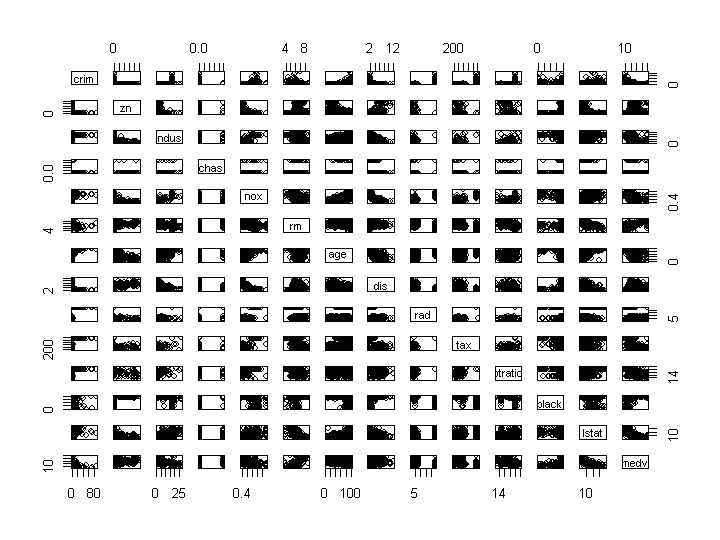

In [26]:
pairs(Boston)
#age and crime correlated, younger = more crime
#lower population in industry zones

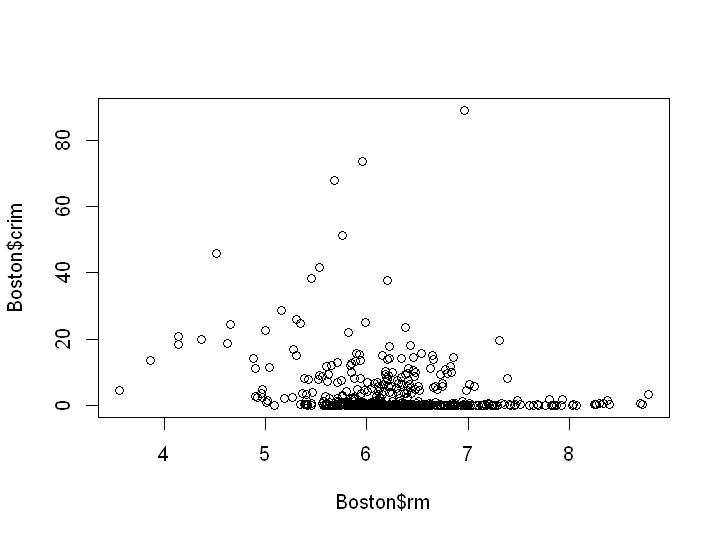

In [28]:
plot(Boston$rm,Boston$crim)
#more rooms means lower crime rate, is probably related to income in the area

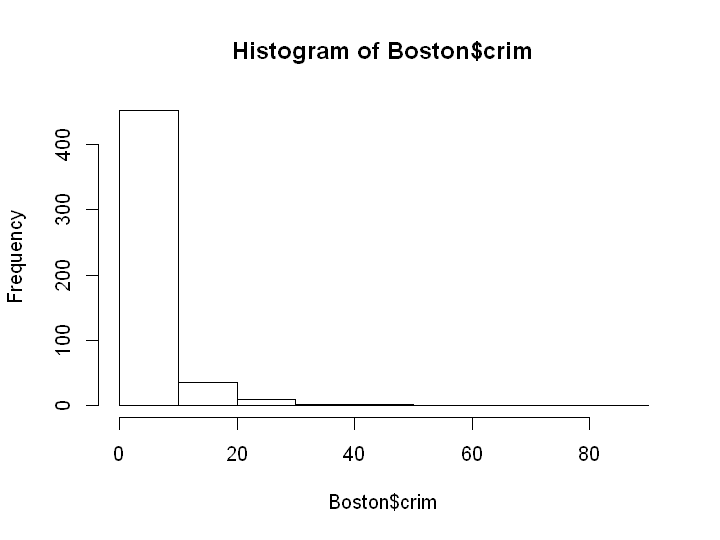

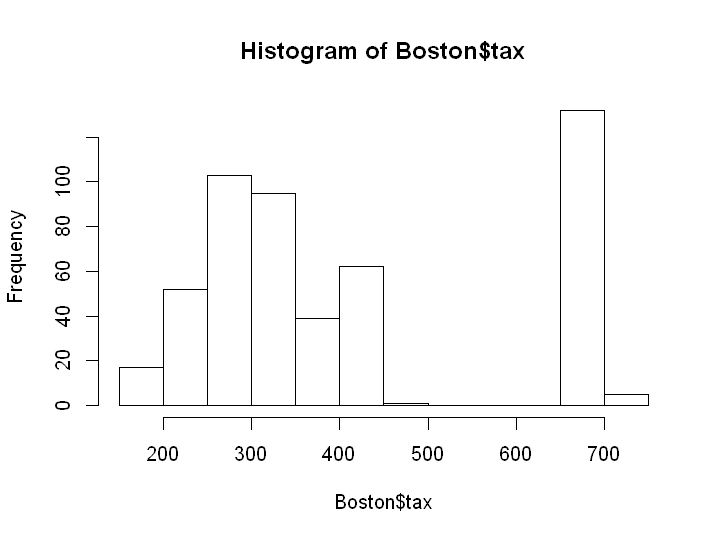

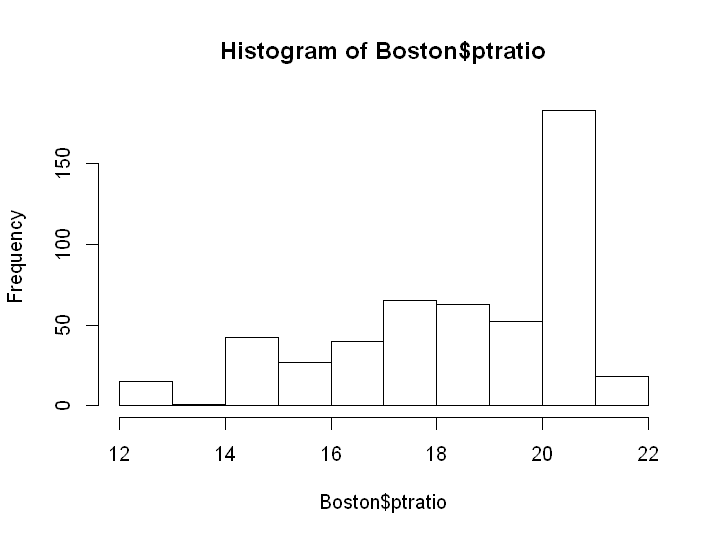

In [29]:
hist(Boston$crim)
hist(Boston$tax)
hist(Boston$ptratio)
#big differences observed 

In [30]:
sum(Boston$chas)
median(Boston$ptratio)
#35 cases, median 19.05

[1] 35

[1] 19.05

In [31]:
Boston[Boston$medv==min(Boston$medv),]
# lowest are 399 and 406, high crime rates 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [32]:
nrow(Boston[Boston$rm > 7,])
nrow(Boston[Boston$rm > 8,])
#64 with more than 7, 13 more than 8

[1] 64

[1] 13

In [33]:
#excercise 3.3
B0 <- 50
B1 <- 20
B2 <- 0.07
B3 <- 35
B4 <- 0.01
B5 <- -10

iq <- 110
gpa <- 4
iq <- 110
gpa <- 4

gender_f <- 1
salary <- B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
print(paste("salary females",salary))

gender_f <- 0
salary <- B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
print(paste("salary males",salary))

[1] "salary females 137.1"
[1] "salary males 142.1"


In [36]:
#excercise 3.10
install.packages("ISLR")
library(ISLR)
head(Carseats)
#a)
lm.fit <- lm(Sales ~ Price + Urban + US, data = Carseats)
summary(lm.fit)
 

#c)
sales <- Price <- UrbanYes <- USYes <- 0
lm.fit$coeff
sales <- B0 + B1 * Price + B2 * UrbanYes + B3 * USYes


#e)
lm.fit1 <- lm(Sales ~ Price + US, data = Carseats)
summary(lm.fit1)

#g)
confint(lm.fit1, level = 0.95)

#h)
summary(Carseats[,c("Sales", "Price", "US")])

Installing package into 'C:/Users/evrijghem/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\evrijghem\AppData\Local\Temp\RtmpaYYHbn\downloaded_packages


Warning message:
"package 'ISLR' was built under R version 3.6.2"

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


(Intercept)       Price    UrbanYes       USYes 
13.04346894 -0.05445885 -0.02191615  1.20057270


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


     Sales            Price         US     
 Min.   : 0.000   Min.   : 24.0   No :142  
 1st Qu.: 5.390   1st Qu.:100.0   Yes:258  
 Median : 7.490   Median :117.0            
 Mean   : 7.496   Mean   :115.8            
 3rd Qu.: 9.320   3rd Qu.:131.0            
 Max.   :16.270   Max.   :191.0            

In [37]:
#excercise 3.15
estim <- NULL
for(pred in names(Boston)){
    lm.fit <- lm(Boston$crim ~ Boston[,pred])
    t_stat <- summary(lm.fit)$predictors[2,]
    estim <- cbind(estim, t)
    colnames(estim)[ncol(estim)] <- pred
}
estim

estim[, estim[4,] < 0.05]

Warning message in summary.lm(lm.fit):
"essentially perfect fit: summary may be unreliable"

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765,9.920765


ERROR: Error in estim[4, ]: subscript out of bounds


In [39]:
multiple <- lm(crim~.,data=Boston)
summary(multiple)

#we see that only zn,dis,rad,black and medv are significant for alpha 5%



Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

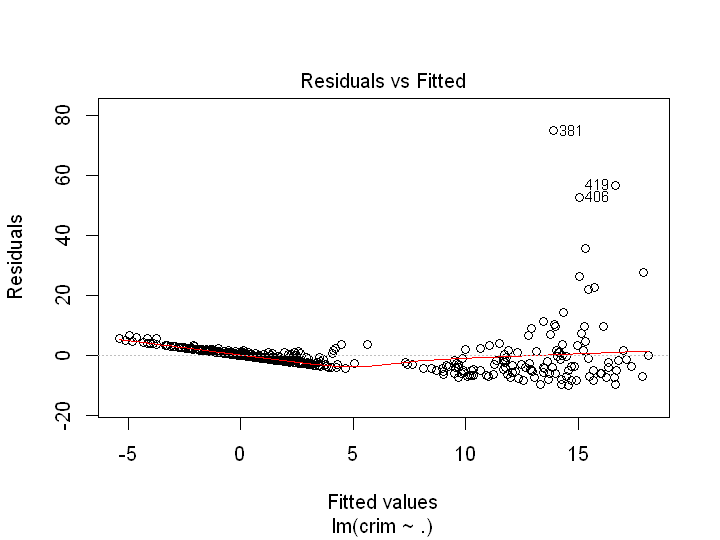

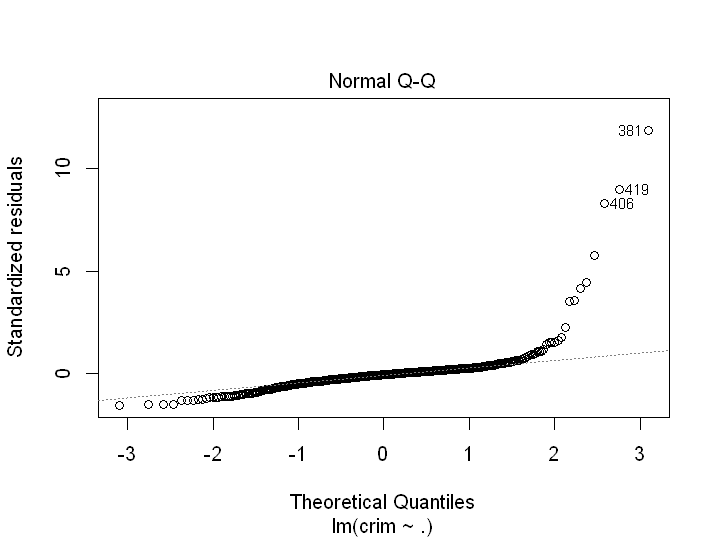

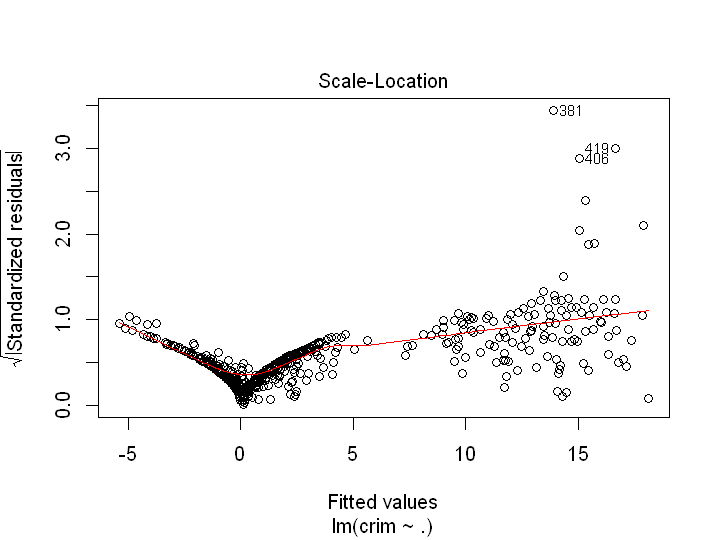

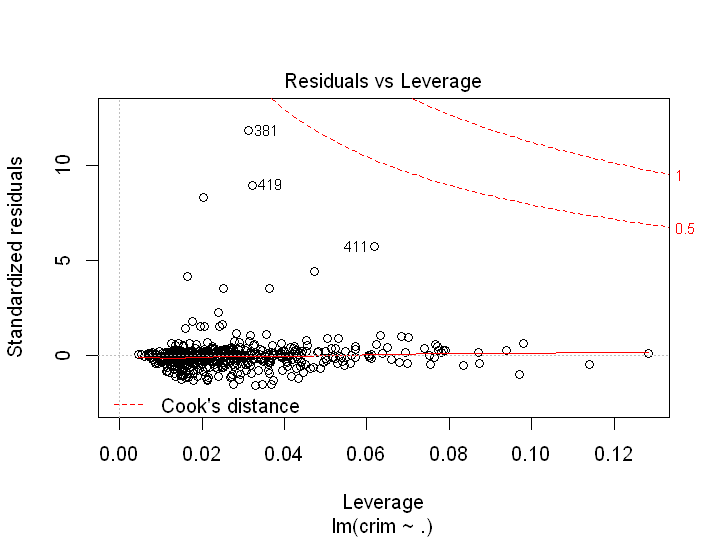

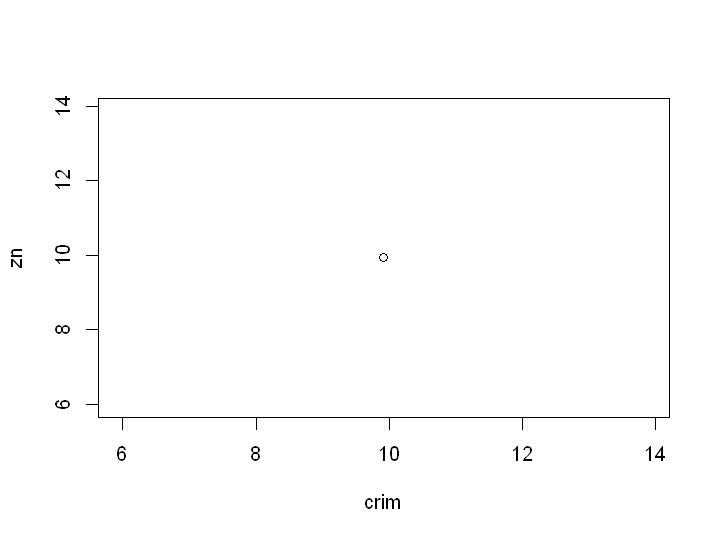

In [40]:
plot(multiple)
plot (estim)

In [42]:
lm.fit2 = lm(crim ~ lstat + I(lstat^2)+ I(lstat^3),data=Boston)
lm.fit2


Call:
lm(formula = crim ~ lstat + I(lstat^2) + I(lstat^3), data = Boston)

Coefficients:
(Intercept)        lstat   I(lstat^2)   I(lstat^3)  
  1.2009656   -0.4490656    0.0557794   -0.0008574  


In [43]:
x = c(1:length(Boston))
colnames(Boston)

for (i in colnames(Boston)){
    x = lm(Boston$crim ~ Boston[i] + I(Boston[i]^2)+ I(Boston[i]^3))

}
x

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

ERROR: Error in model.frame.default(formula = Boston$crim ~ Boston[i] + I(Boston[i]^2) + : invalid type (list) for variable 'Boston[i]'


In [44]:
#this is incorrect and needs some explaining
a <- NULL
for (i in colnames(Boston)){
    d <- lm(Boston$crim ~ Boston$i)
    t <- summary(d)$i[2,]
    a <- cbind(d, t)
}
a

d                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               